In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/TarunChaubey/ML/master/Dataset/Hackthon/HR%20Analytics/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/TarunChaubey/ML/master/Dataset/Hackthon/HR%20Analytics/test.csv")

train.shape, test.shape

((54808, 14), (23490, 13))

##### Copy Data Into Another variable to avoid reload from github

In [5]:
train_copy = train.copy()
test_copy = test.copy()

In [6]:
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [7]:
train.duplicated().sum()

0

In [8]:
data = pd.concat([train,test],axis = 0)
data.shape

(78298, 14)

In [9]:
data = data.drop('employee_id',axis = 1)

In [10]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            78298 non-null  object 
 1   region                78298 non-null  object 
 2   education             74855 non-null  object 
 3   gender                78298 non-null  object 
 4   recruitment_channel   78298 non-null  object 
 5   no_of_trainings       78298 non-null  int64  
 6   age                   78298 non-null  int64  
 7   previous_year_rating  72362 non-null  float64
 8   length_of_service     78298 non-null  int64  
 9   KPIs_met >80%         78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    78298 non-null  int64  
 12  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 8.4+ MB


In [12]:
data.isnull().sum()*100/len(data)

department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
dtype: float64

In [13]:
data.isnull().sum()

department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [14]:
data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
dtype: object

In [15]:
# Check Unique Data in object columns
for col in data.select_dtypes(include='object').columns:
    print(col , ':' ,  len(data[col].unique()),'label')

department : 9 label
region : 34 label
education : 4 label
gender : 2 label
recruitment_channel : 3 label


In [16]:
for col in data.select_dtypes(include='object').columns:
    print(f" \n Column Name : {col} \n", data[col].unique())

 
 Column Name : department 
 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
 
 Column Name : region 
 ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
 
 Column Name : education 
 ["Master's & above" "Bachelor's" nan 'Below Secondary']
 
 Column Name : gender 
 ['f' 'm']
 
 Column Name : recruitment_channel 
 ['sourcing' 'other' 'referred']


In [17]:
data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [18]:
data['previous_year_rating']  = data['previous_year_rating'].fillna(3.33)
data['education']  = data['education'].fillna("Bachelor's")

In [19]:
data['region'] = data['region'].apply(lambda x :x.split('_')[-1])

In [20]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [21]:
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()

In [22]:
for col in data.select_dtypes(include='object').columns:
    data[col] = leb.fit_transform(data[col])
    
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0.0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0.0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0.0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0.0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0.0


## EDA

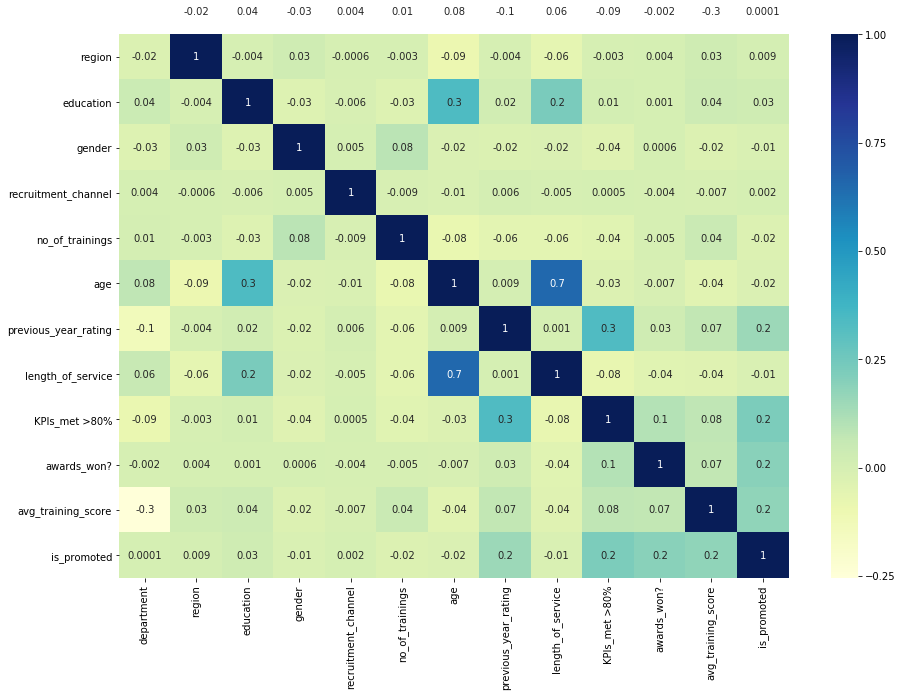

In [23]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(data.corr(), annot = True, cmap="YlGnBu",fmt='.1g' )
top, bottom = ax.get_ylim()
ax.set_ylim(top +.5, bottom +.5)

plt.show()

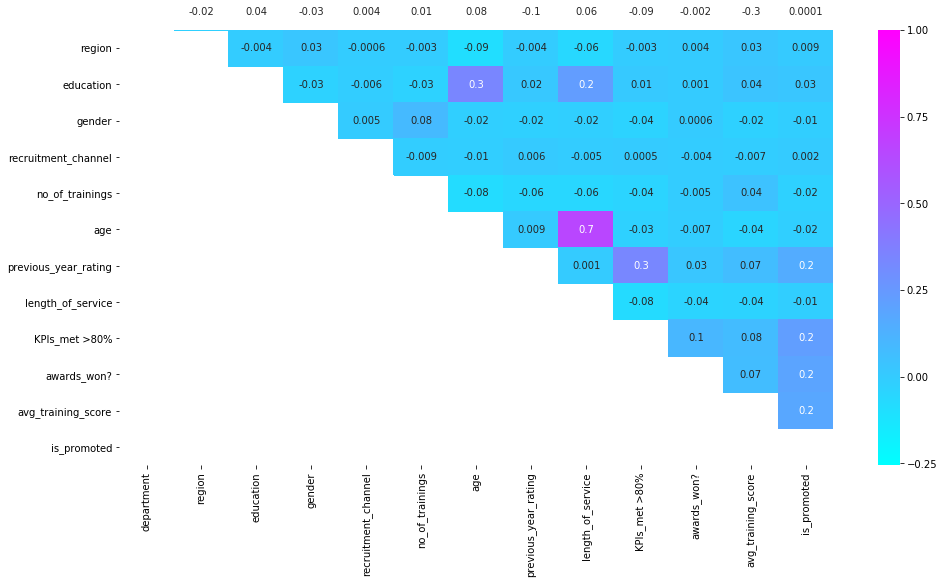

In [24]:
plt.figure(figsize = (16,8))
mask = np.tril(data.corr())
ax = sns.heatmap(data.corr(), annot = True, fmt = '.1g', mask = mask, cmap = 'cool')
top, bottom  = ax.get_ylim()
ax.set_ylim(top +.5 , bottom +.5)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002844D55DE08>,
      dtype=object)

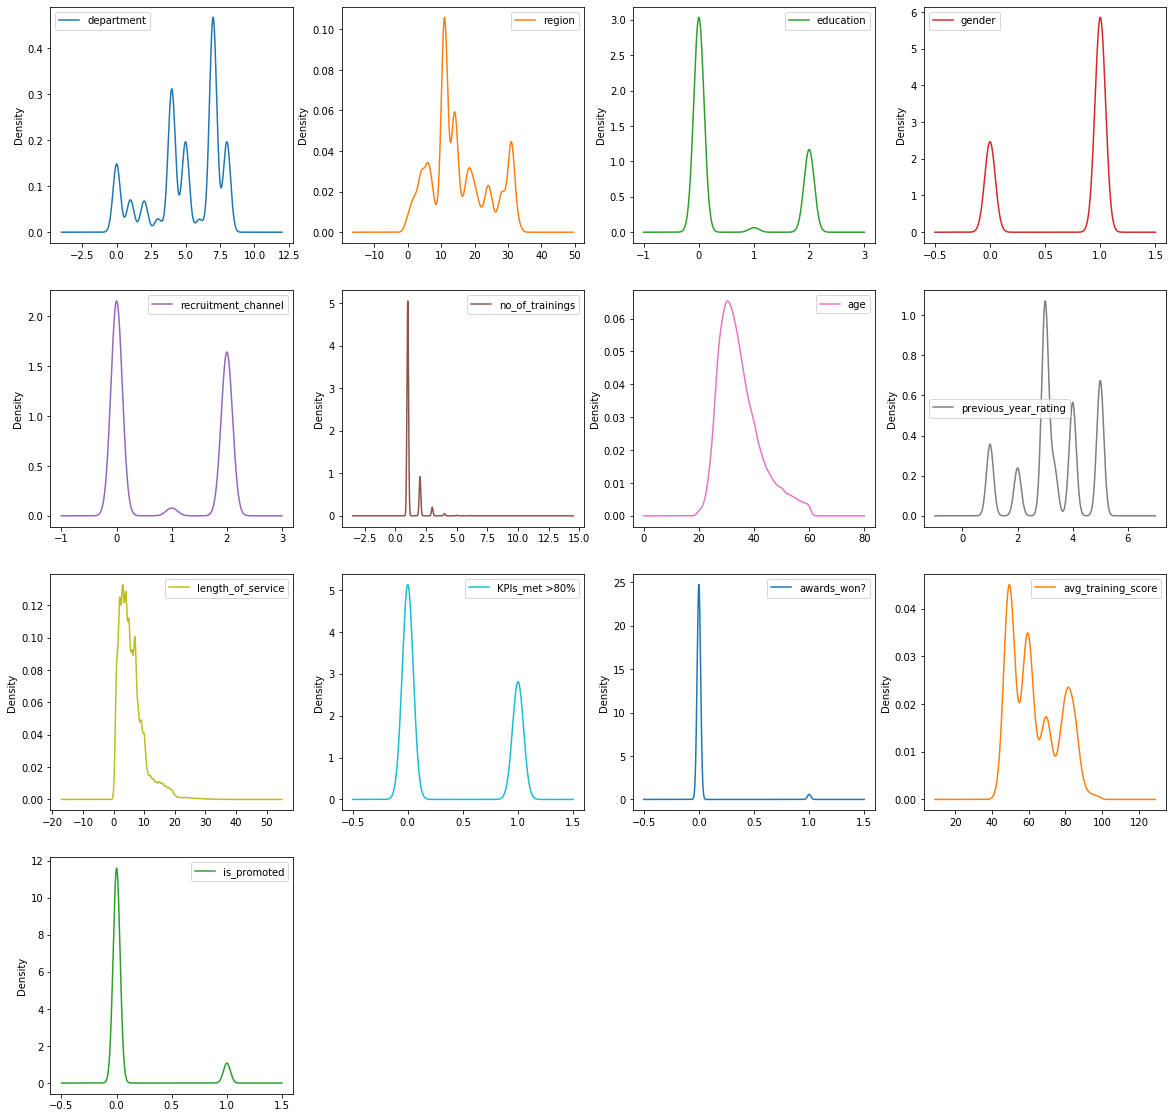

In [25]:
data.plot(kind = 'density', subplots = True, layout = (4,4),sharex = False, figsize = (20,20))

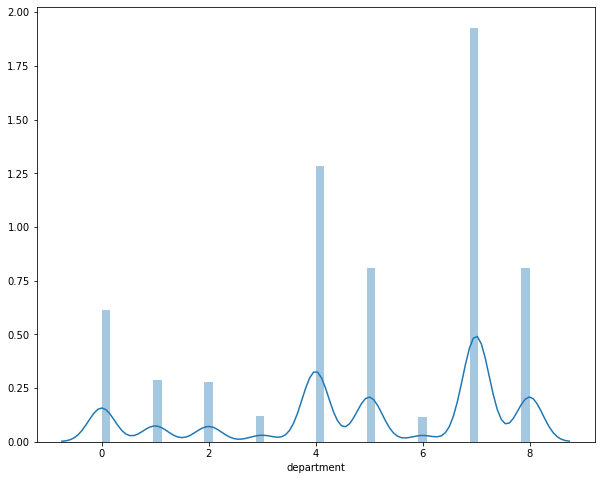

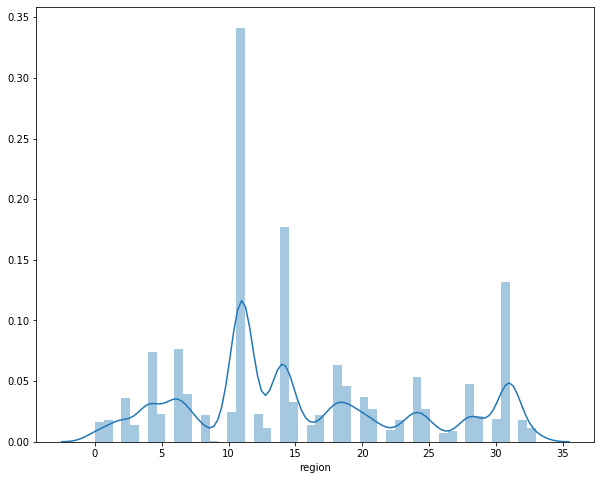

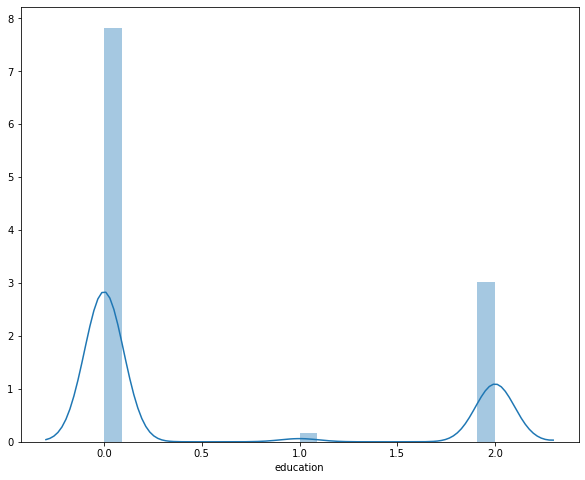

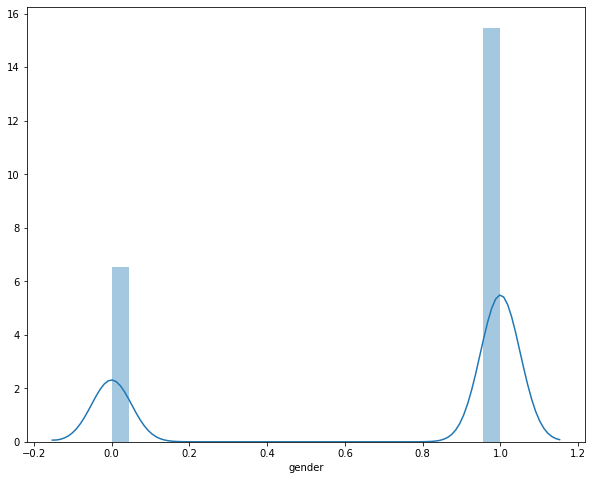

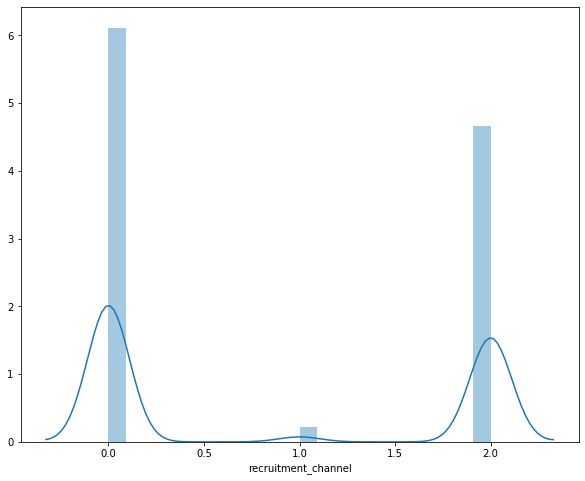

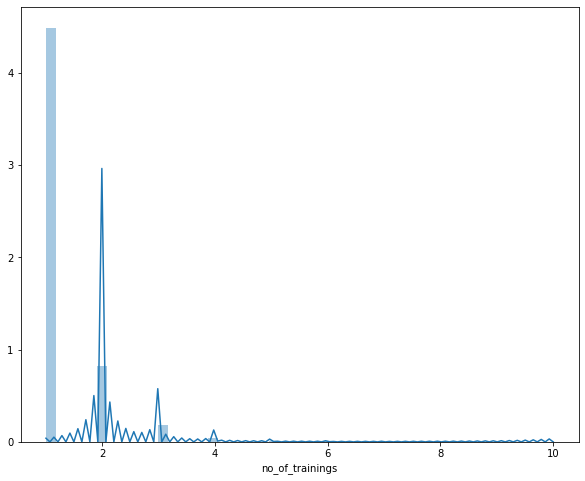

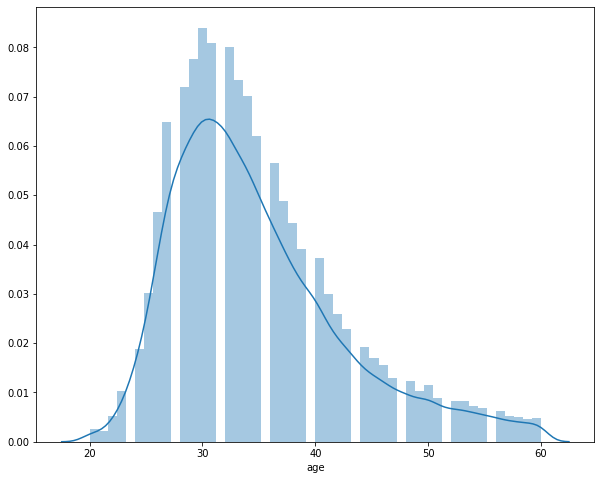

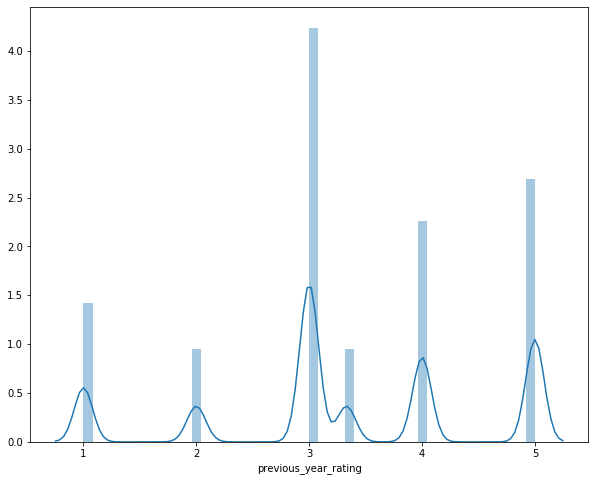

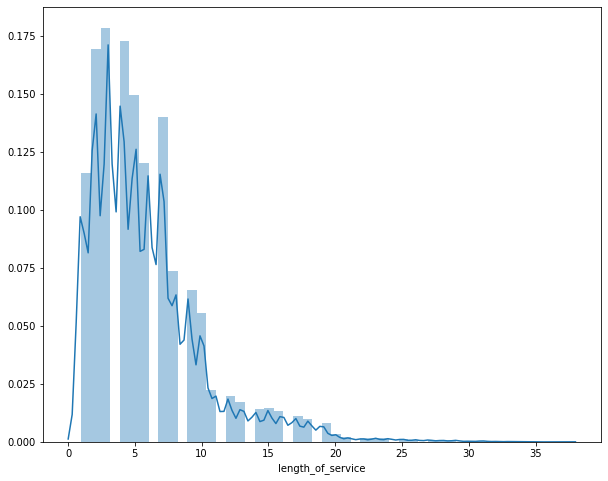

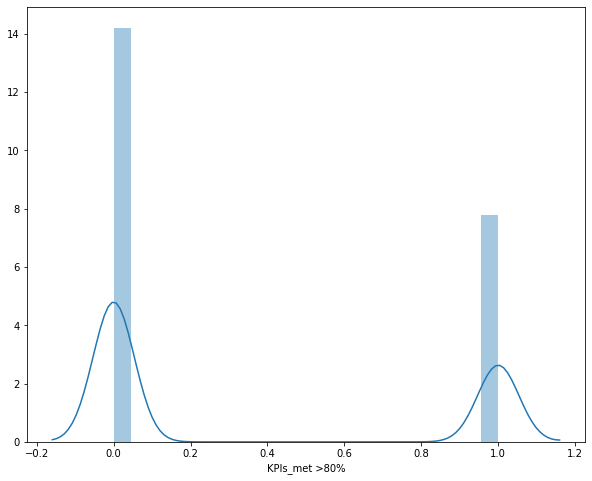

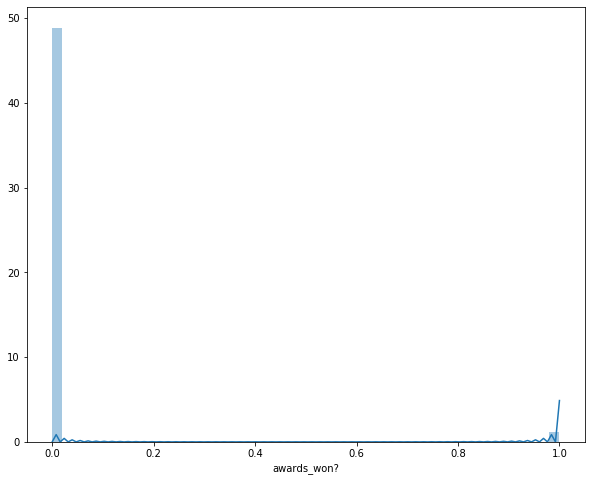

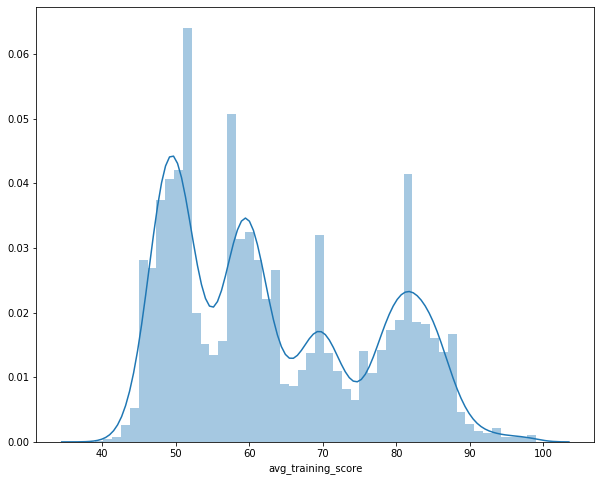

In [26]:
for col in data.drop('is_promoted',axis = 1).columns:
    plt.figure(figsize=(10,8))
    sns.distplot(data[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002844E036F08>,
      dtype=object)

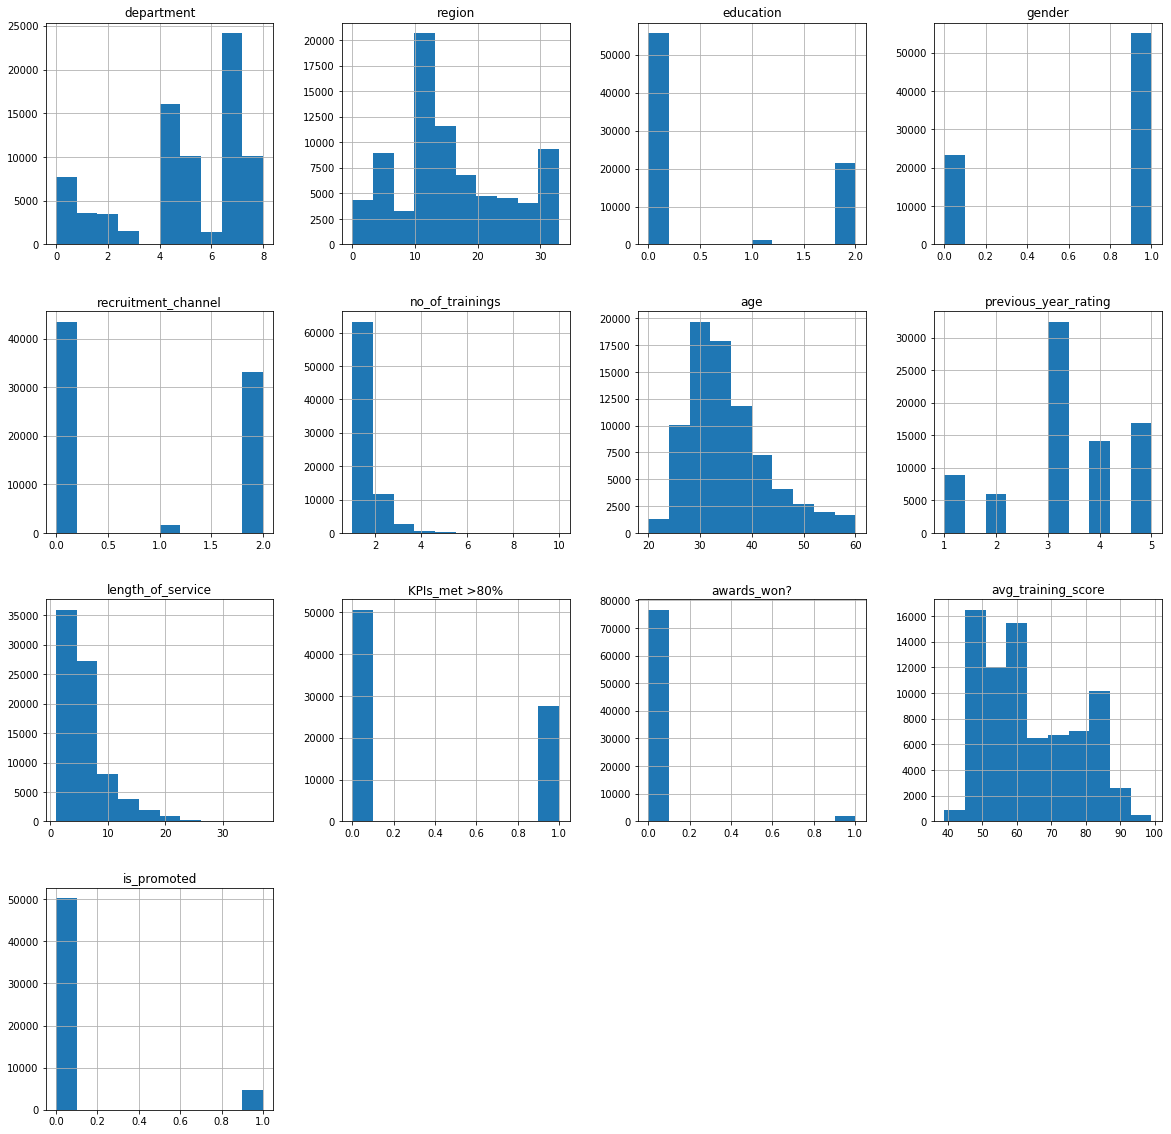

In [27]:
data.hist(figsize = (20,20))

# Build Model

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train = data[:len(train)]
test = data[len(train):]

train.shape, test.shape

((54808, 13), (23490, 13))

In [66]:
test = test.drop('is_promoted', axis  = 1)
test.shape

(23490, 12)

In [67]:
X = train.drop('is_promoted',axis = 1)
y = train['is_promoted']

X.shape, y.shape

((54808, 12), (54808,))

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100,)

In [69]:
X_train.shape, X_test.shape

((41106, 12), (13702, 12))

In [70]:
y_train.shape, y_test.shape

((41106,), (13702,))

# Training Model

## Decision Tree

In [71]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

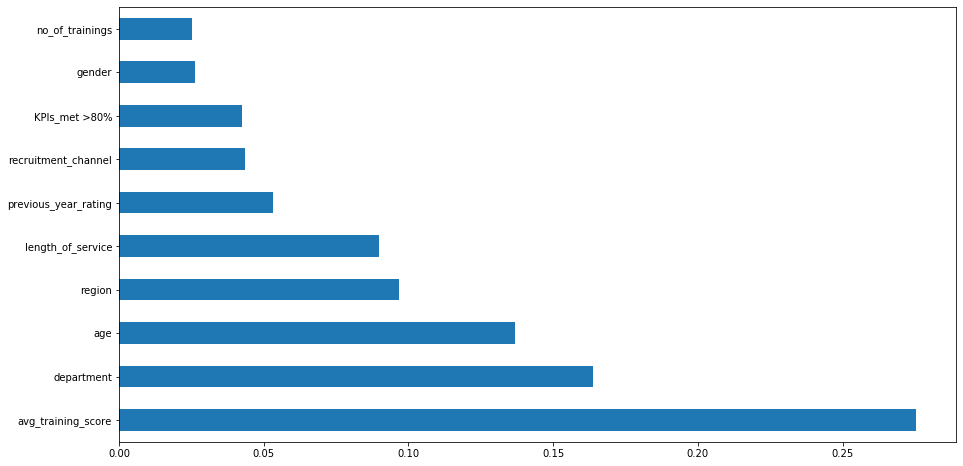

In [72]:
plt.figure(figsize=(15,8))
pd.Series(model_DT.feature_importances_ , index=X.columns).nlargest(10).plot.barh()

In [73]:
pred_DT = model_DT.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,pred_DT)
Accuary_DT = metrics.accuracy_score(y_test,pred_DT)
Report_DT = metrics.classification_report(y_test,pred_DT)
F1_Score_DT = metrics.f1_score(y_test,pred_DT)

print("Accuary_DT\n",Accuary_DT, "\n\nClassification_Report\n",Report_DT, "\n\nConfusion_Matrix\n", confusion_matrix,
     "\n\nF1_Score_DT\n", F1_Score_DT)

Accuary_DT
 0.8946869070208728 

Classification_Report
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     12503
         1.0       0.41      0.46      0.43      1199

    accuracy                           0.89     13702
   macro avg       0.68      0.70      0.69     13702
weighted avg       0.90      0.89      0.90     13702
 

Confusion_Matrix
 [[11706   797]
 [  646   553]] 

F1_Score_DT
 0.4338956453511181


## RandomForestRegressor

In [74]:
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train,y_train)
pred_RFR = model_RFR.predict(X_test)
Accuary_RFR = metrics.accuracy_score(y_test,pred_RFR)
confusion_matrix_RFR = metrics.confusion_matrix(y_test,pred_RFR)
Report_RFR = metrics.classification_report(y_test,pred_RFR)
F1_Score_RFR = metrics.f1_score(y_test,pred_RFR)

print("Accuary_RFR\n",Accuary_RFR, "\n\nClassification_Report_RFR\n",Report_RFR, "\n\nConfusion_Matrix_RFR\n", confusion_matrix_RFR,
     "\n\nF1_Score_RFR\n", F1_Score_RFR)

Accuary_RFR
 0.9324186250182455 

Classification_Report_RFR
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     12503
         1.0       0.83      0.29      0.43      1199

    accuracy                           0.93     13702
   macro avg       0.88      0.64      0.69     13702
weighted avg       0.93      0.93      0.92     13702
 

Confusion_Matrix_RFR
 [[12433    70]
 [  856   343]] 

F1_Score_RFR
 0.42555831265508687


## LogisticRegression

In [75]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
pred_LR = model_LR.predict(X_test)
confusion_matrix_LR = metrics.confusion_matrix(y_test,pred_LR)
Accuary_LR = metrics.accuracy_score(y_test,pred_LR)
Report_LR = metrics.classification_report(y_test,pred_LR)
F1_Score_LR = metrics.f1_score(y_test,pred_LR)

In [76]:
print("Accuary_LR\n",Accuary_LR, "\n\nClassification_Report_LR\n",Report_LR, "\n\nConfusion_Matrix_LR\n", confusion_matrix_LR,
     "\n\nF1_Score_LR\n", F1_Score_LR)

Accuary_LR
 0.9111078674646037 

Classification_Report_LR
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     12503
         1.0       0.45      0.08      0.13      1199

    accuracy                           0.91     13702
   macro avg       0.69      0.53      0.54     13702
weighted avg       0.88      0.91      0.88     13702
 

Confusion_Matrix_LR
 [[12390   113]
 [ 1105    94]] 

F1_Score_LR
 0.13371266002844953


## RidgeClassifier

In [77]:
model_RC = RidgeClassifier()
model_RC.fit(X_train,y_train)
pred_RC = model_RC.predict(X_test)
confusion_matrix_RC = metrics.confusion_matrix(y_test,pred_RC)
Accuary_RC = metrics.accuracy_score(y_test,pred_RC)
Report_RC = metrics.classification_report(y_test,pred_RC)
F1_Score_RC = metrics.f1_score(y_test,pred_RC)
    
print("Accuary_RC\n",Accuary_RC, "\n\nClassification_Report_LR\n",Report_RC, "\n\nconfusion_matrix_RC\n", confusion_matrix_RC,
     "\n\nF1_Score_RC\n", F1_Score_RC)

Accuary_RC
 0.9143920595533499 

Classification_Report_LR
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     12503
         1.0       0.65      0.05      0.09      1199

    accuracy                           0.91     13702
   macro avg       0.78      0.52      0.52     13702
weighted avg       0.89      0.91      0.88     13702
 

confusion_matrix_RC
 [[12472    31]
 [ 1142    57]] 

F1_Score_RC
 0.08857808857808858


## GradientBoostingRegressor

In [78]:
model_xgb = GradientBoostingClassifier()
model_xgb.fit(X_train,y_train)
pred_xgb = model_xgb.predict(X_test)
confusion_matrix_xgb = metrics.confusion_matrix(y_test,pred_xgb)
Accuary_xgb = metrics.accuracy_score(y_test,pred_xgb)
Report_xgb = metrics.classification_report(y_test,pred_xgb)
F1_Score_xgb = metrics.f1_score(y_test,pred_xgb)

In [79]:
print("Accuary_xgb\n",Accuary_xgb, "\n\nClassification_Report_xgb\n",Report_xgb, "\n\nconfusion_matrix_xgb\n", confusion_matrix_xgb,
     "\n\nF1_Score_xgb\n", F1_Score_xgb)

Accuary_xgb
 0.9359217632462414 

Classification_Report_xgb
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     12503
         1.0       0.94      0.29      0.44      1199

    accuracy                           0.94     13702
   macro avg       0.94      0.64      0.70     13702
weighted avg       0.94      0.94      0.92     13702
 

confusion_matrix_xgb
 [[12482    21]
 [  857   342]] 

F1_Score_xgb
 0.43790012804097306


## XGBRegressor

In [82]:
model_XGBR =XGBClassifier()
model_XGBR.fit(X_train,y_train)
pred_XGBR = model_XGBR.predict(X_test)
confusion_matrix_XGBR = metrics.confusion_matrix(y_test,pred_XGBR)
Accuary_XGBR = metrics.accuracy_score(y_test,pred_XGBR)
Report_XGBR = metrics.classification_report(y_test,pred_XGBR)
F1_Score_XGBR = metrics.f1_score(y_test,pred_XGBR)

In [83]:
print("Accuary_XGBR\n",Accuary_XGBR, "\n\nClassification_Report_XGBR\n",Report_XGBR, "\n\nconfusion_matrix_XGBR\n", confusion_matrix_XGBR,
     "\n\nF1_Score_XGBR\n", F1_Score_XGBR)

Accuary_XGBR
 0.93424317617866 

Classification_Report_XGBR
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     12503
         1.0       0.96      0.26      0.41      1199

    accuracy                           0.93     13702
   macro avg       0.95      0.63      0.69     13702
weighted avg       0.94      0.93      0.92     13702
 

confusion_matrix_XGBR
 [[12490    13]
 [  888   311]] 

F1_Score_XGBR
 0.40840446487196325


In [95]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion' : ['entropy', 'gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [96]:
rf=XGBClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 137.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 160.9min finished


RandomizedSearchCV(cv=2, estimator=XGBClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [97]:
rf_randomcv.best_estimator_

XGBClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
              min_samples_leaf=6, min_samples_split=14, n_estimators=200)

In [98]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [99]:
model_XGBR =XGBClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
              min_samples_leaf=6, min_samples_split=14, n_estimators=200)
model_XGBR.fit(X_train,y_train)
pred_XGBR = model_XGBR.predict(X_test)
confusion_matrix_XGBR = metrics.confusion_matrix(y_test,pred_XGBR)
Accuary_XGBR = metrics.accuracy_score(y_test,pred_XGBR)
Report_XGBR = metrics.classification_report(y_test,pred_XGBR)
F1_Score_XGBR = metrics.f1_score(y_test,pred_XGBR)

In [100]:
print("Accuary_XGBR\n",Accuary_XGBR, "\n\nClassification_Report_XGBR\n",Report_XGBR, "\n\nconfusion_matrix_XGBR\n", confusion_matrix_XGBR,
     "\n\nF1_Score_XGBR\n", F1_Score_XGBR)

Accuary_XGBR
 0.9403736680776529 

Classification_Report_XGBR
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     12503
         1.0       0.86      0.38      0.53      1199

    accuracy                           0.94     13702
   macro avg       0.90      0.69      0.75     13702
weighted avg       0.94      0.94      0.93     13702
 

confusion_matrix_XGBR
 [[12429    74]
 [  743   456]] 

F1_Score_XGBR
 0.5274725274725275


## Output

In [87]:
out = pd.read_csv('https://raw.githubusercontent.com/TarunChaubey/ML/master/Dataset/Hackthon/HR%20Analytics/sample_submission.csv')
out.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [101]:
predicted = model_XGBR.predict(test)
predicted

array([0., 0., 0., ..., 0., 0., 1.])

In [102]:
out['is_promoted'] = predicted

In [103]:
out.to_csv('E:\sample_submission.csv')